In [1]:
import os
import random
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt

from PIL import Image

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [2]:
path_ki67_base = '/mnt/ssd2tb/phiwei/he_ki67_low_res/6/source'
path_he_base = '/mnt/ssd2tb/phiwei/he_ki67_low_res/6/target'

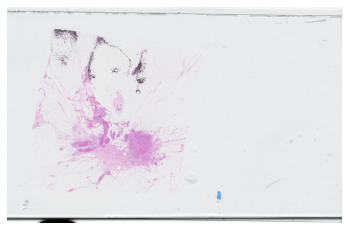

In [3]:
img_he = np.asarray(Image.open(os.path.join(path_he_base, np.random.choice(os.listdir(path_he_base)))))
plt.imshow(img_he)
plt.axis('off')
plt.show()

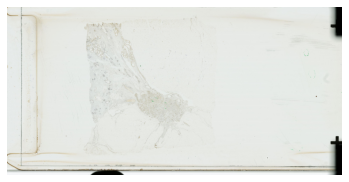

In [4]:
img_ki67 = np.asarray(Image.open(os.path.join(path_ki67_base, np.random.choice(os.listdir(path_ki67_base)))))
plt.imshow(img_ki67)
plt.axis('off')
plt.show()

In [5]:
transform = A.Compose([
    A.RandomCrop(512, 512),
    A.RandomRotate90(p=1.), 
    A.Flip(p=0.5), 
    A.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1, always_apply=True)
])
print(transform)

Compose([
  RandomCrop(always_apply=False, p=1.0, height=512, width=512),
  RandomRotate90(always_apply=False, p=1.0),
  Flip(always_apply=False, p=0.5),
  ColorJitter(always_apply=True, p=0.5, brightness=[0.9, 1.1], contrast=[0.9, 1.1], saturation=[0.9, 1.1], hue=[-0.1, 0.1]),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})


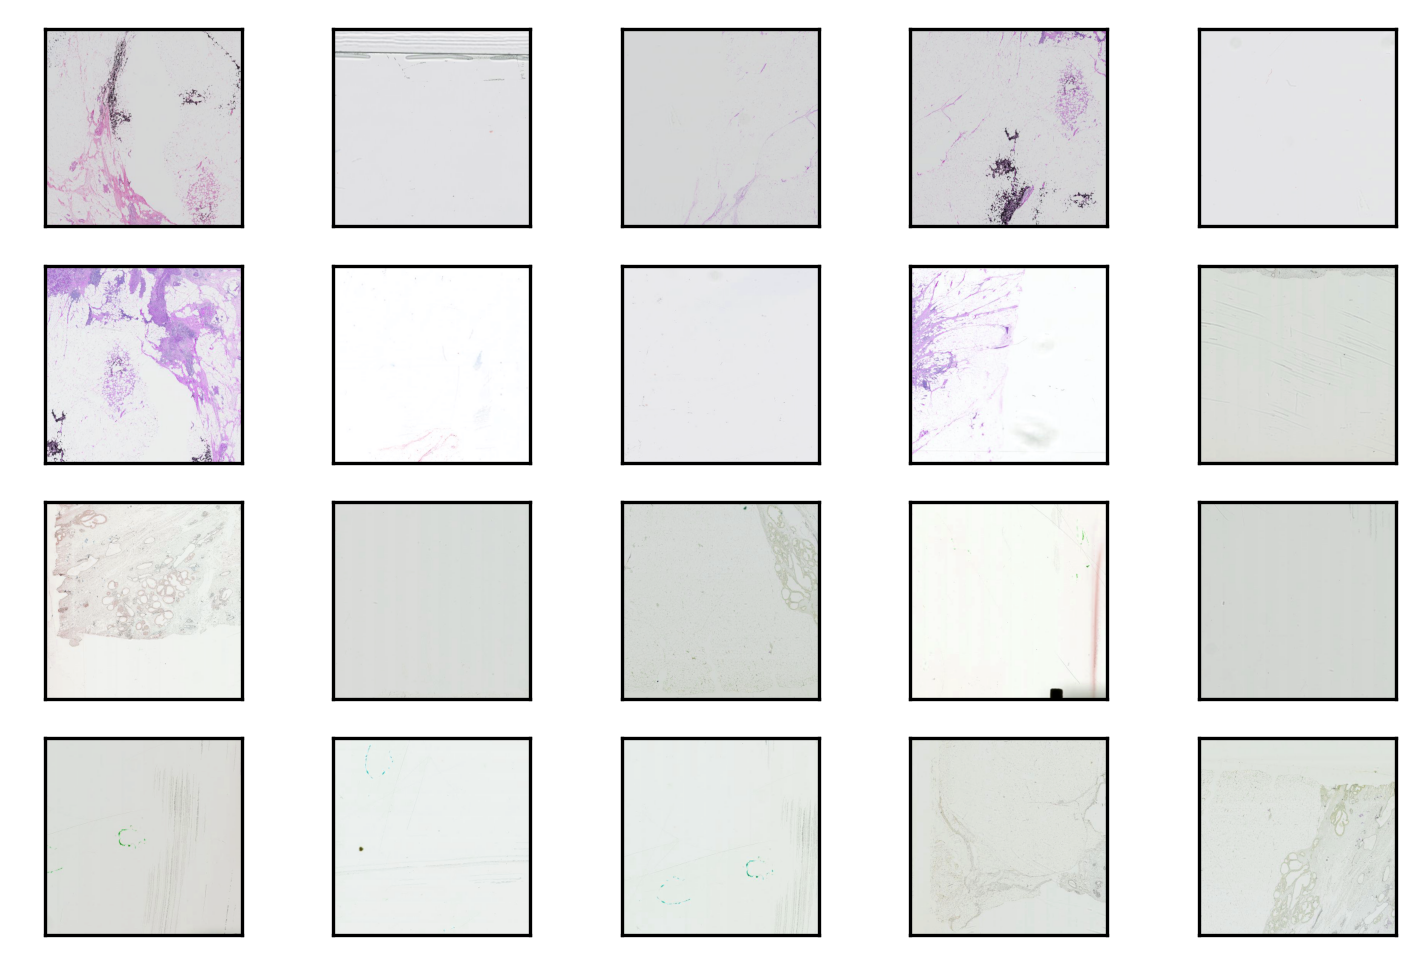

In [6]:
fig, axs = plt.subplots(4, 5, dpi=300)
for i in range(1, 21):
    
    ax = plt.subplot(4, 5, i)
    if i < 10:
        img_curr = img_he
    else:
        img_curr = img_ki67
    
    img_aug = transform(image=img_curr)['image']
    ax.imshow(img_aug)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [7]:
A.save(transform, '../config/config_albumentations.yml', data_format='yaml')